## Group details 
    
    Group Number: 258

## Group members details

    1. Shipra Sonal - 2020sc04383
    2. Aditya Verma - 2020sc04605
    3. S.Lakshmi Narashiman - 2020sc04873

    
## Dataset name
    
    Signature.csv Dataset


# Importing all required modules


In [1]:
import pandas as pd
import numpy as np 
import math 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from matplotlib import rcParams


import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn import model_selection
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sklearn



# Importing Data
* We are using Pandas and Numpy for Data manupulation

In [2]:
# Variable Name configuration

file_path = "/Users/soshipra/Documents/BITS Study 2nd SEM/ML/Assignment/V1"
file_name = "Signature.csv"

In [3]:

df = pd.read_csv(file_path+"/"+file_name)

In [4]:
# Printing 5 rows
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly



### 2.Description and shape of dataset

In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('Shape of dateset:', df.shape)

Shape of dateset: (22544, 40)


## Analysing the target class problem
* We can see that the target variables are imbalance class problems

#### 3. Insights of data through visualisation
#### 4. Exploration of dataset

<AxesSubplot:>

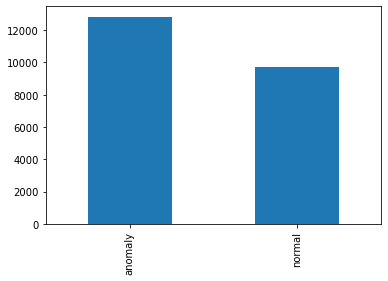

In [7]:
df['class'].value_counts().plot.bar()

## Creating the numerical verison of class variable for easy analysis

In [8]:
df['class_num'] =  np.where(df["class"]=='anomaly',1,0)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,class_num
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,0
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,0
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly,1
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,0


## Checking for null values and their counts in dataset

In [9]:
 df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent                          0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                          18
srv_count                      13
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

# Checking for percentage of null values

In [10]:
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

count        0.079844
srv_count    0.057665
dtype: float64

# Checking the data types and value counts for each fields

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

# Basic EDA for numerical columns 

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_num
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,0.569242
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,0.495193
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,1.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Basic EDA for categorical columns

In [13]:
df.describe(include=['O'])

,protocol_type,service,flag,class
count,22544,22544,22544,22544
unique,3,64,11,2
top,tcp,http,SF,anomaly
freq,18880,7853,14875,12833


### 3. Data Pre-processing and cleaning
##### 1. Appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. 

# Identifying catgorical columns - (which might have mis-identifed as numeric value while importing)

In [14]:
#Trying to identify categorical columns which could have mis-identified  as numeric
for i in df.columns:
    if df[i].nunique()<20:
        print(i)
        print(df[i].unique())
        print("-"*50)

protocol_type
['tcp' 'icmp' 'udp']
--------------------------------------------------
flag
['REJ' 'SF' 'RSTO' 'S0' 'RSTR' 'SH' 'S3' 'S2' 'S1' 'RSTOS0' 'OTH']
--------------------------------------------------
land
[0 1]
--------------------------------------------------
wrong_fragment
[0 1 3]
--------------------------------------------------
urgent
[0 1 2 3]
--------------------------------------------------
hot
[  0   4   2   1   7   6   5   3  22  10  11  19 101  18  15  30]
--------------------------------------------------
num_failed_logins
[0 1 3 2 4]
--------------------------------------------------
logged_in
[0 1]
--------------------------------------------------
root_shell
[0 1]
--------------------------------------------------
su_attempted
[0 2 1]
--------------------------------------------------
num_file_creations
[  0   4   2   1   3 100   5   6   7]
--------------------------------------------------
num_shells
[0 1 2 5]
-------------------------------------------------

# Converting the columns to categorical values which were mis-identified as numeric values as per our understanding from above results

In [15]:
df.loc[:,['land','wrong_fragment','urgent','logged_in','root_shell','su_attempted','is_guest_login']] = df[['land','wrong_fragment','urgent','logged_in','root_shell','su_attempted','is_guest_login']].astype('O')


#  Bifurcating different column types as lists for easy combined operations

In [16]:
#Finding categorical features
Target = 'class_num'
remove_col = 'class'
numerical_col = list(df._get_numeric_data().columns)
numerical_col.remove('class_num')
print(numerical_col)

nominal_col = list(set(df.columns)-set(numerical_col))
nominal_col.remove('class')
nominal_col.remove('class_num')


nominal_col

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


['urgent',
 'protocol_type',
 'land',
 'logged_in',
 'root_shell',
 'wrong_fragment',
 'service',
 'flag',
 'is_guest_login',
 'su_attempted']

# Visualizing and analyzing the distribution of categorical columns

----------------------------------------------------------------------------------------------------
urgent
----------------------------------------------------------------------------------------------------


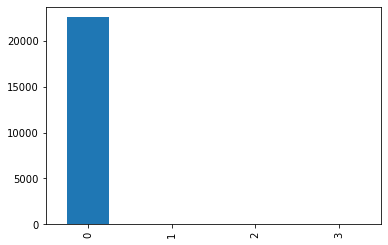

----------------------------------------------------------------------------------------------------
protocol_type
----------------------------------------------------------------------------------------------------


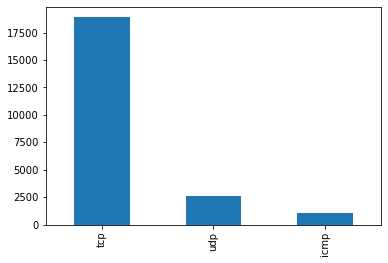

----------------------------------------------------------------------------------------------------
land
----------------------------------------------------------------------------------------------------


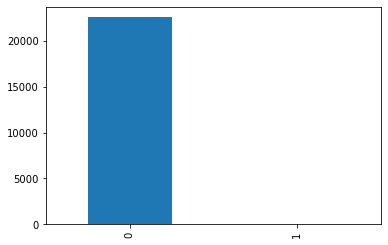

----------------------------------------------------------------------------------------------------
logged_in
----------------------------------------------------------------------------------------------------


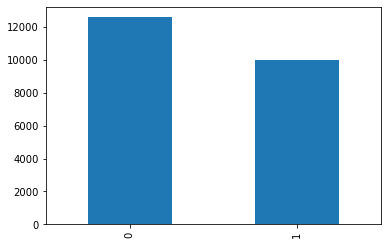

----------------------------------------------------------------------------------------------------
root_shell
----------------------------------------------------------------------------------------------------


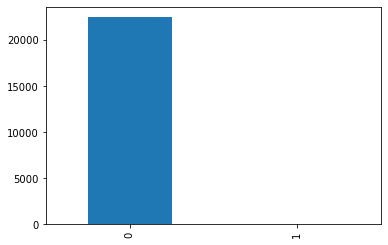

----------------------------------------------------------------------------------------------------
wrong_fragment
----------------------------------------------------------------------------------------------------


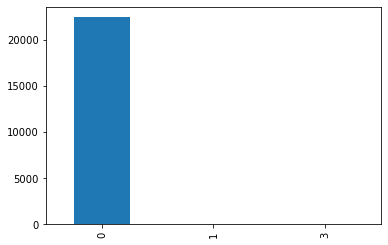

----------------------------------------------------------------------------------------------------
service
----------------------------------------------------------------------------------------------------


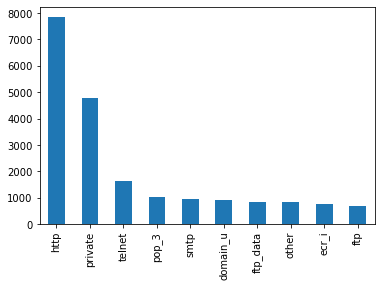

----------------------------------------------------------------------------------------------------
flag
----------------------------------------------------------------------------------------------------


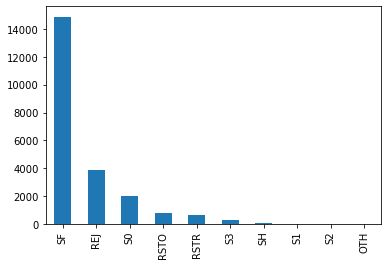

----------------------------------------------------------------------------------------------------
is_guest_login
----------------------------------------------------------------------------------------------------


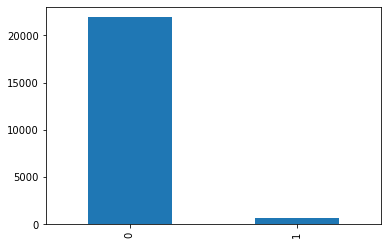

----------------------------------------------------------------------------------------------------
su_attempted
----------------------------------------------------------------------------------------------------


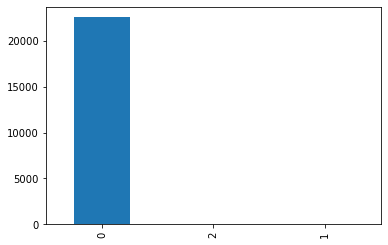

In [17]:
#distibution in category 
for i in nominal_col:
    print('-'*100)
    print(i)
    print('-'*100)
    df[i].value_counts()[0:10].plot.bar()
    plt.show()

# Visualising the numerical attributes for better understanding of data

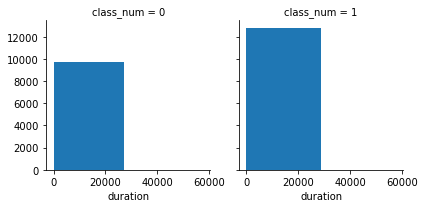

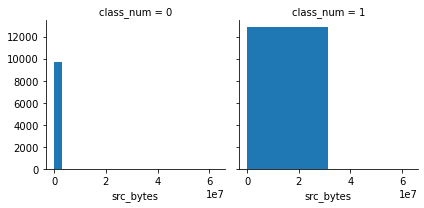

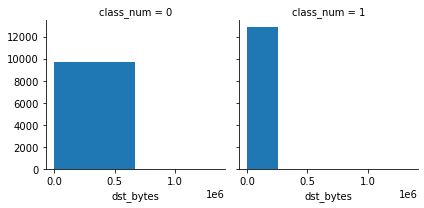

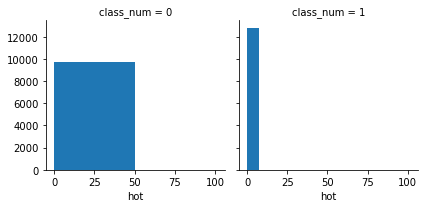

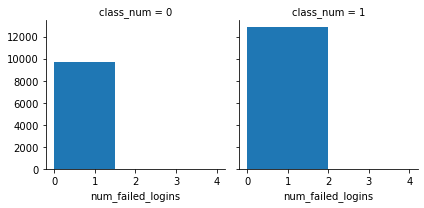

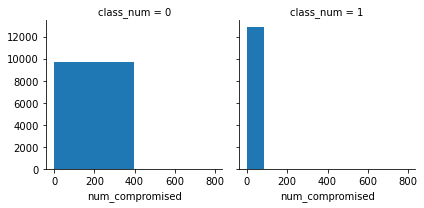

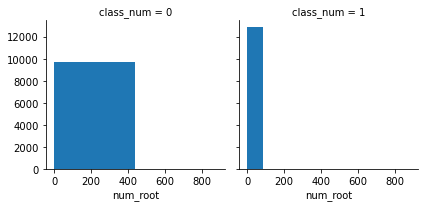

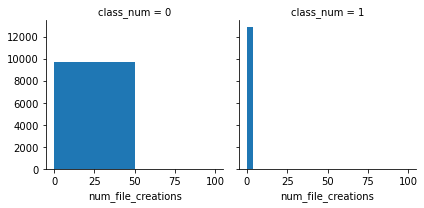

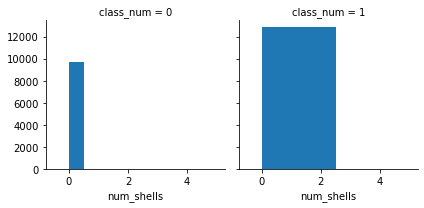

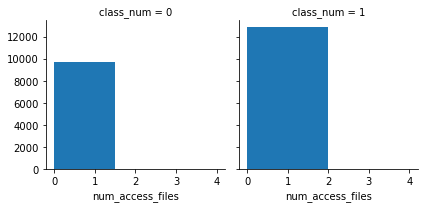

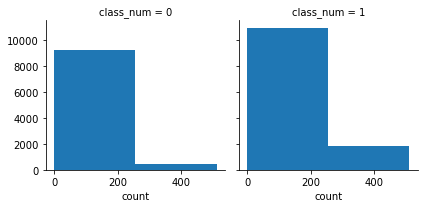

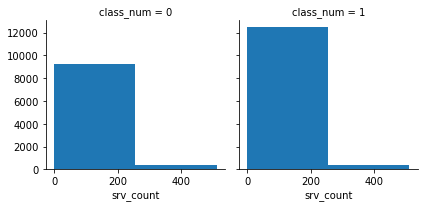

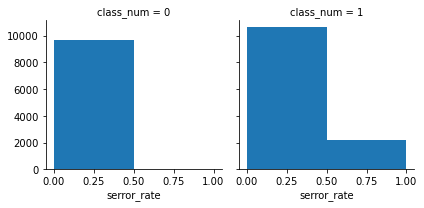

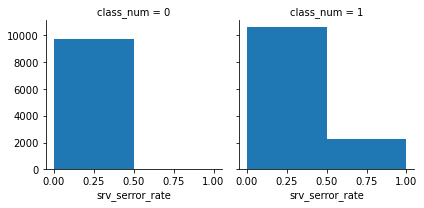

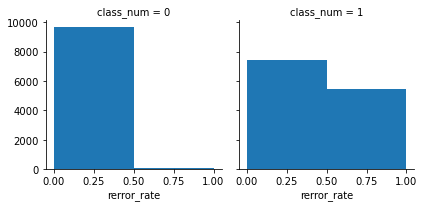

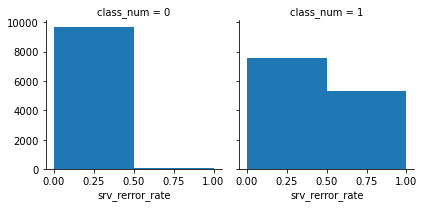

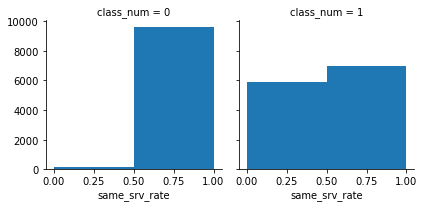

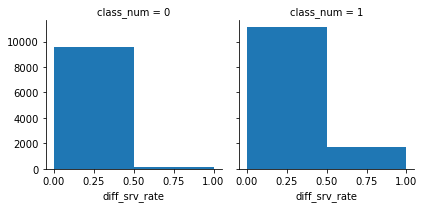

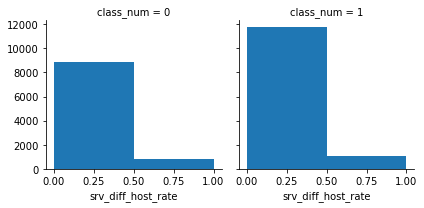

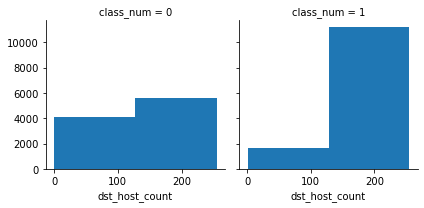

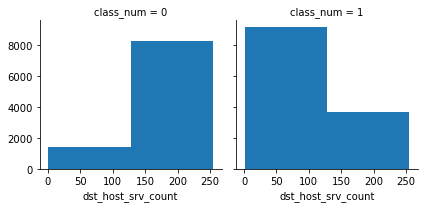

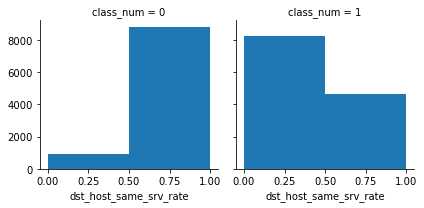

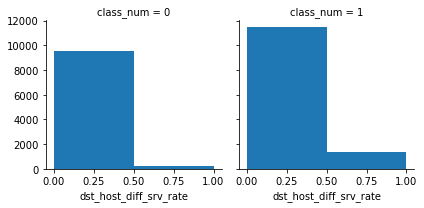

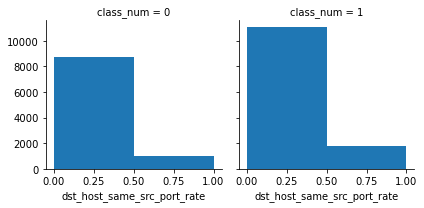

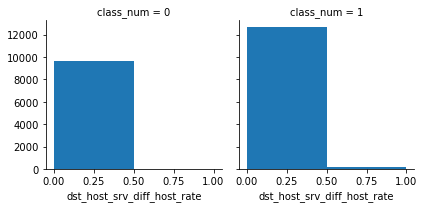

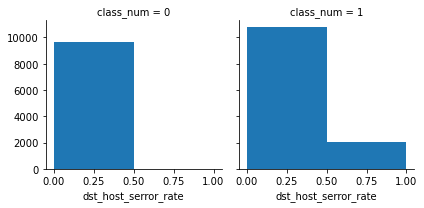

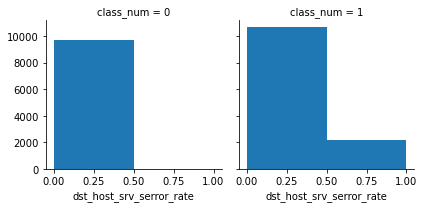

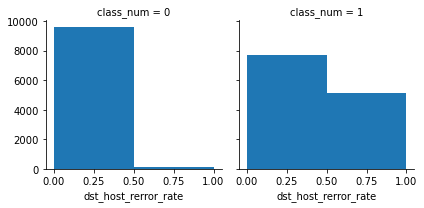

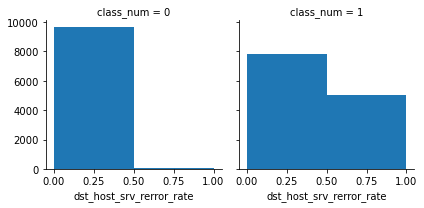

In [18]:
for i in numerical_col:
    g = sns.FacetGrid(df, col=Target)
    g.map(plt.hist, i, bins=2)

# Visualising target vs distribution over different features

In [19]:
result = pd.DataFrame()
result['class'] = df.class_num

duration
src_bytes
dst_bytes
hot
num_failed_logins
num_compromised
num_root
num_file_creations
num_shells
num_access_files
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate


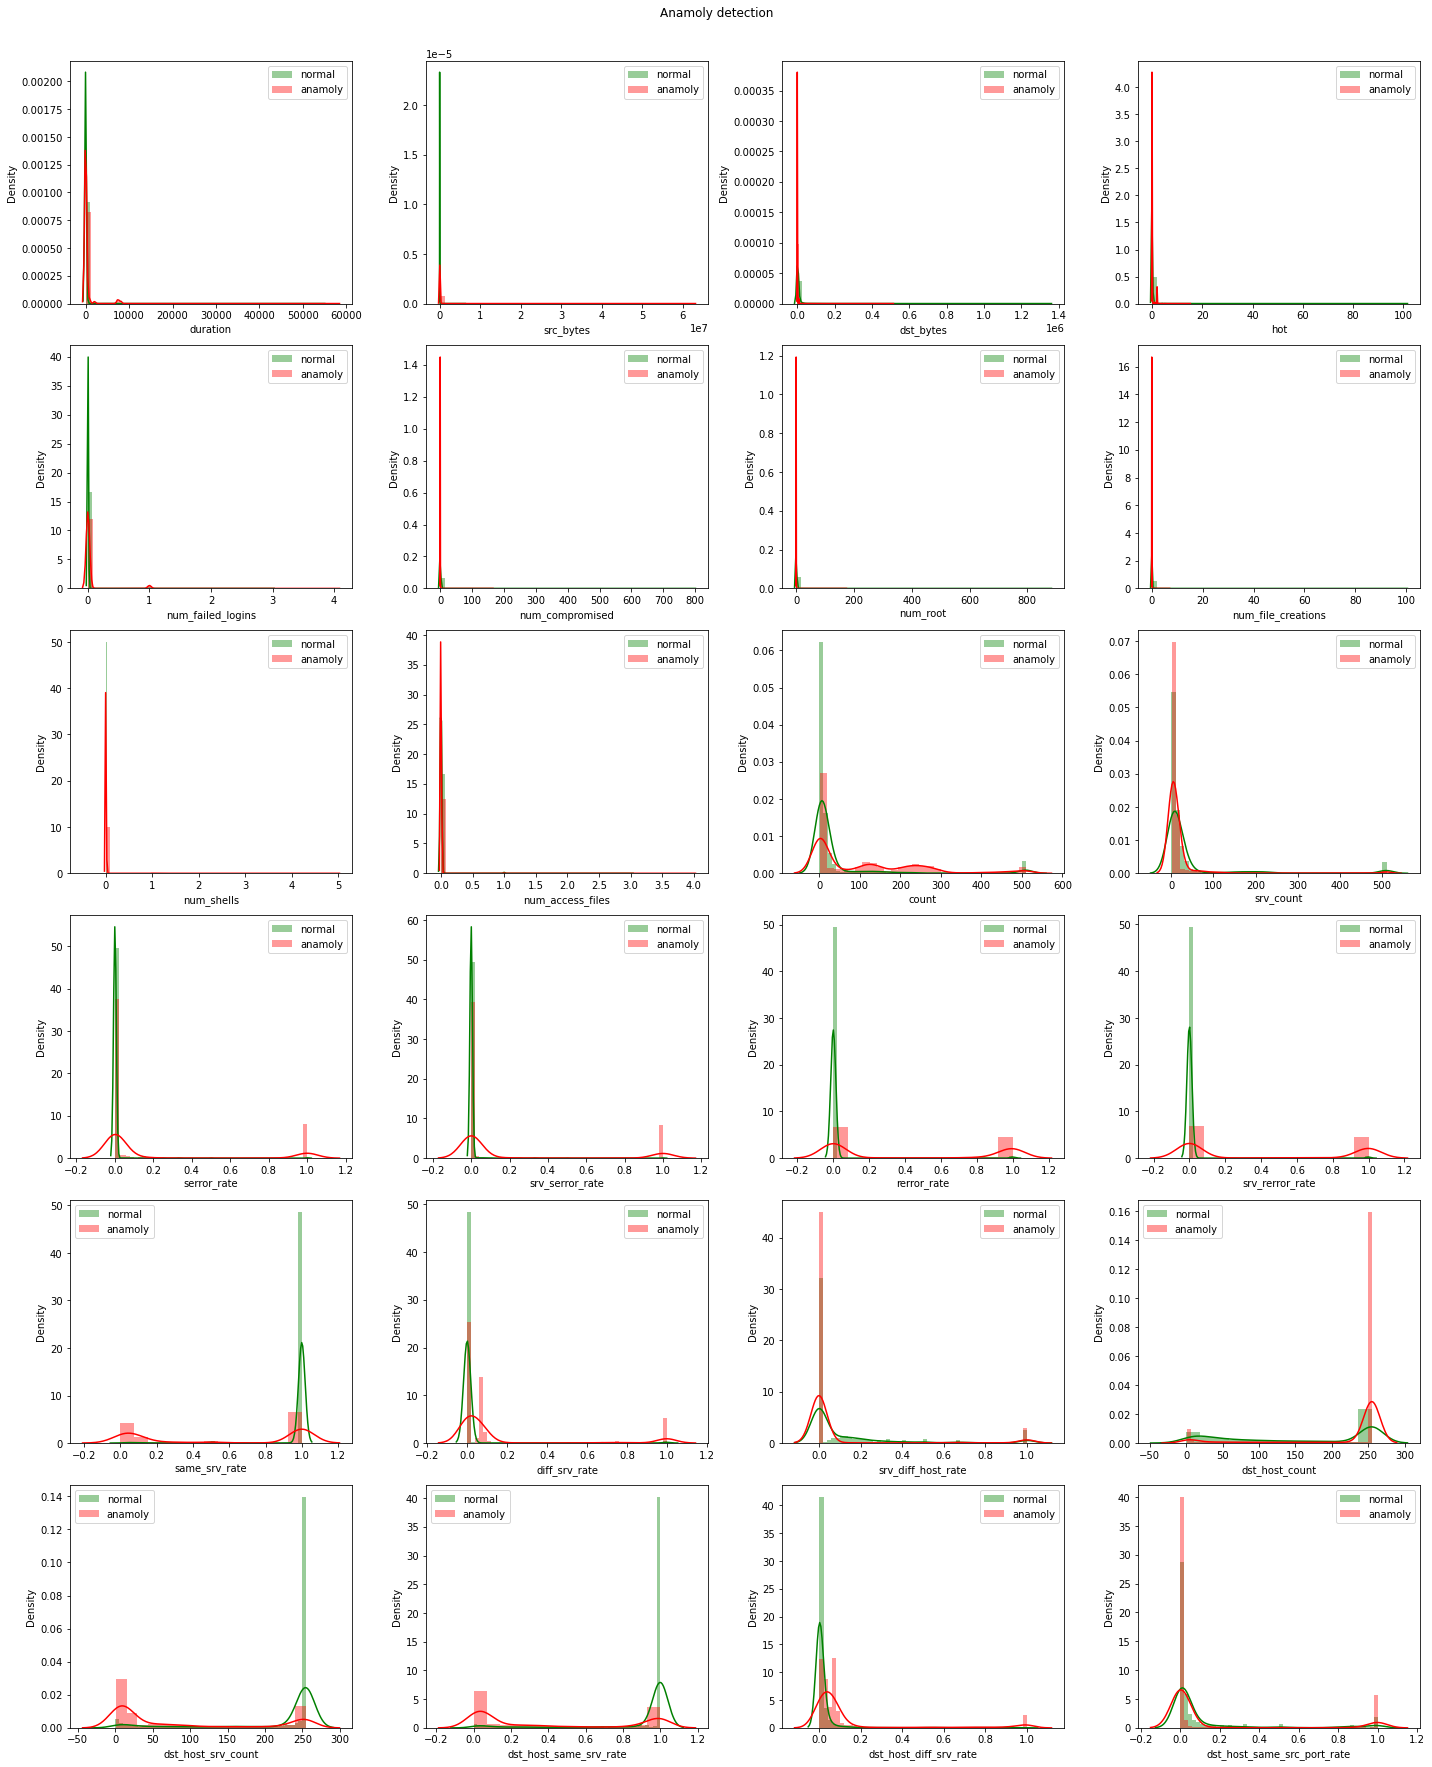

In [20]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in [x for x in df[numerical_col].columns if x not in ['urgent']][0:24]:
    print(i)
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][result['class']==0], color='g', label = 'normal')
    sns.distplot(df[i][result['class']==1], color='r', label = 'anamoly')
    plt.legend(loc='best')
fig.suptitle('Anamoly detection')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Analysing the event rate in each category in detail for nominal attributes

In [21]:
for i in nominal_col: 
    temp = df[[i, Target]].fillna('NA').groupby([i], as_index=False).sum().sort_values(by=Target, ascending=False)
    temp1 = pd.DataFrame(df[i].fillna('NA').value_counts() )

    temp1.columns = [i+'_value_count']
    temp.rename(columns = {'class_num': i+'_target_count'},inplace = True)
    temp = temp.merge(temp1, left_on=  temp[i] ,right_on=temp1.index).drop(columns='key_0')
    temp[i+'count_%'] = temp[i+'_value_count']/(temp[i+'_value_count'].sum())
    temp[i+'_target_%'] = temp[i+'_target_count']/temp[i+'_value_count']
    temp[i+'_target_%_total'] = temp[i+'_target_count']/temp[i+'_target_count'].sum()
    temp = temp[[i,i+'_value_count',i+'_target_count',i+'count_%',i+'_target_%',i+'_target_%_total']]
    print('-'*100)
    print(i)
    print('-'*100)
    print(temp)
    print('*'*100)
    print(' '*100)

----------------------------------------------------------------------------------------------------
urgent
----------------------------------------------------------------------------------------------------
   urgent  urgent_value_count  urgent_target_count  urgentcount_%  \
0       0               22534                12823       0.999556   
1       1                   5                    5       0.000222   
2       2                   4                    4       0.000177   
3       3                   1                    1       0.000044   

   urgent_target_%  urgent_target_%_total  
0         0.569051               0.999221  
1         1.000000               0.000390  
2         1.000000               0.000312  
3         1.000000               0.000078  
****************************************************************************************************
                                                                                                    
-----------------------

# Replacing the numerical missing values with the median

In [22]:
imr = SimpleImputer(missing_values=np.NaN, strategy='median')
imr = imr.fit(df[numerical_col])
df[numerical_col] = imr.transform(df[numerical_col])

# Replacing the categorical missing values with the mode

In [23]:
imr = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
imr = imr.fit(df[nominal_col])
df[nominal_col] = imr.transform(df[nominal_col])

##### 2. Do the correlational analysis on the dataset. Provide a visualization for the same.

# Analysing and visualizing the correlation between variables 

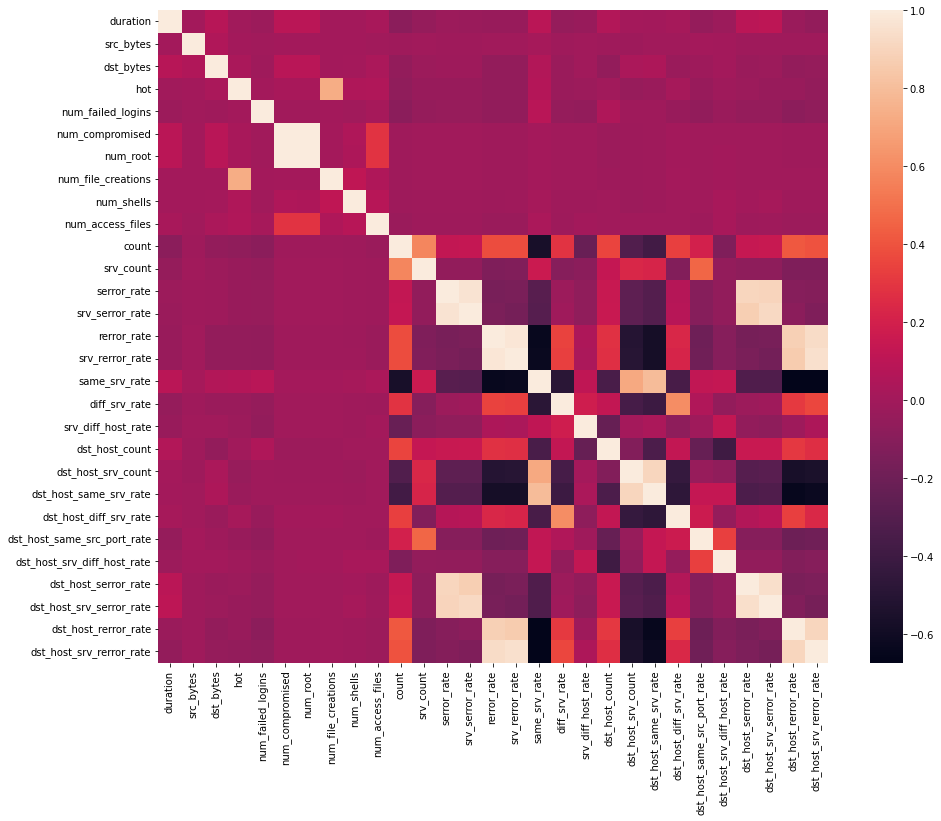

In [24]:
corr = df[numerical_col].corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

# Analysing the correlation between variable in tabular view

In [25]:
pd.set_option('display.max_column',None)
# corr.reset_index(inplace=True)
corr

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.002673,0.078951,-0.004688,-0.021159,0.095383,0.095269,0.000537,0.001630,0.022909,-0.090482,-0.046608,-0.021690,-0.026958,-0.039459,-0.035447,0.095709,-0.050109,-0.038697,0.060631,0.010076,0.004985,0.016746,-0.052325,-0.024126,0.093246,0.107698,-0.029375,-0.055959
src_bytes,0.002673,1.000000,0.053634,0.002631,-0.003127,-0.000098,-0.000274,-0.000203,-0.000388,-0.001021,-0.012442,-0.006026,-0.007239,-0.007224,-0.005738,-0.005587,0.013744,-0.007687,-0.006796,-0.009418,-0.014236,-0.006796,-0.002920,0.008955,0.004873,-0.007699,-0.007494,-0.010351,-0.009956
dst_bytes,0.078951,0.053634,1.000000,0.027913,-0.011167,0.089808,0.088287,0.004721,0.011365,0.038296,-0.055390,-0.025499,-0.019685,-0.019924,-0.053452,-0.052848,0.059869,-0.031762,-0.004087,-0.055142,0.037879,0.041176,-0.030930,-0.019014,0.002876,-0.030166,-0.020413,-0.054114,-0.051588
hot,-0.004688,0.002631,0.027913,1.000000,-0.000137,0.024989,0.022528,0.726828,0.048024,0.052526,-0.068094,-0.035454,-0.037202,-0.037327,-0.056655,-0.057126,0.068183,-0.033184,-0.025872,-0.003837,-0.041783,-0.029866,0.016772,-0.033412,-0.010385,-0.025538,-0.036631,-0.035848,-0.058160
num_failed_logins,-0.021159,-0.003127,-0.011167,-0.000137,1.000000,-0.000873,-0.000879,0.004244,-0.003459,0.014218,-0.087154,-0.048407,-0.046183,-0.046067,-0.064206,-0.063054,0.090288,-0.051138,-0.054558,0.049423,-0.007139,-0.009534,-0.038990,-0.060067,-0.029661,-0.049818,-0.048367,-0.079955,-0.066030
num_compromised,0.095383,-0.000098,0.089808,0.024989,-0.000873,1.000000,0.995960,0.011895,0.048406,0.285937,-0.009962,-0.005399,-0.005713,-0.005700,-0.009123,-0.009043,0.010382,-0.005988,-0.005412,-0.021678,-0.014775,-0.009773,0.000075,-0.003586,-0.001461,-0.004815,-0.004122,-0.009273,-0.008039
num_root,0.095269,-0.000274,0.088287,0.022528,-0.000879,0.995960,1.000000,0.011430,0.042626,0.286659,-0.008650,-0.004821,-0.004969,-0.004954,-0.008172,-0.008057,0.008976,-0.005177,-0.005474,-0.023595,-0.016920,-0.011524,0.000860,-0.002525,0.000128,-0.004649,-0.004057,-0.008237,-0.007115
num_file_creations,0.000537,-0.000203,0.004721,0.726828,0.004244,0.011895,0.011430,1.000000,0.115714,0.048603,-0.007832,-0.004362,-0.004499,-0.004485,-0.007399,-0.007295,0.008048,-0.004434,-0.004221,-0.014859,-0.013767,-0.011774,0.007347,-0.001767,0.005780,-0.001994,-0.000655,-0.005065,-0.006626
num_shells,0.001630,-0.000388,0.011365,0.048024,-0.003459,0.048406,0.042626,0.115714,1.000000,0.080468,-0.014572,-0.008122,-0.008370,-0.008344,-0.013766,-0.013573,0.015121,-0.008720,-0.009295,-0.003513,-0.021212,-0.016766,-0.003952,-0.004853,0.025418,0.005029,0.013815,-0.009801,-0.010818
num_access_files,0.022909,-0.001021,0.038296,0.052526,0.014218,0.285937,0.286659,0.048603,0.080468,1.000000,-0.031123,-0.015889,-0.018231,-0.018175,-0.029982,-0.029563,0.032934,-0.018993,0.001319,-0.004907,-0.003487,-0.001483,-0.003150,-0.016999,0.021742,-0.013756,-0.013304,-0.021214,-0.024838


# Identifying the features which are highly correlated so that we can drop them

In [26]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
#         print("-"*50)
#         print(corr.index[i],corr.columns[j],corr.iloc[i,j])
        
        if corr.iloc[i,j] >= 0.9:
            print(corr.index[i],corr.columns[j],corr.iloc[i,j])
            print("-"*50)
            if columns[j]:
                columns[j] = False
selected_columns = df[numerical_col].columns[columns]
selected_columns

num_compromised num_root 0.9959602532947552
--------------------------------------------------
serror_rate srv_serror_rate 0.9663749036280885
--------------------------------------------------
serror_rate dst_host_serror_rate 0.9040996555718146
--------------------------------------------------
serror_rate dst_host_srv_serror_rate 0.900799368127891
--------------------------------------------------
srv_serror_rate dst_host_srv_serror_rate 0.9209687628509551
--------------------------------------------------
rerror_rate srv_rerror_rate 0.9755351540808526
--------------------------------------------------
rerror_rate dst_host_srv_rerror_rate 0.9310253924785401
--------------------------------------------------
srv_rerror_rate dst_host_srv_rerror_rate 0.9478491337777993
--------------------------------------------------
dst_host_srv_count dst_host_same_srv_rate 0.9043602221365408
--------------------------------------------------
dst_host_serror_rate dst_host_srv_serror_rate 0.94501617664

Index(['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins',
       'num_compromised', 'num_file_creations', 'num_shells',
       'num_access_files', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate'],
      dtype='object')

# Removing highly correlated features

In [27]:
drop_col = [x for x in numerical_col if x not in selected_columns]
drop_col

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [28]:
df.drop(drop_col, axis=1, inplace=True)

In [29]:
numerical_col = selected_columns

# 5. Applying the feature transformation techniques - Standardization

In [30]:
scaler = StandardScaler()

df.iloc[:,[df.columns.get_loc(x) for x in numerical_col]] = scaler.fit_transform(df.iloc[:,[df.columns.get_loc(x) for x in numerical_col]].to_numpy())


# Performing onehot encoding for Nominal Columns

In [31]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error',drop='if_binary')

enc_df = pd.DataFrame(enc.fit_transform(df[nominal_col]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
22540,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
22541,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
22542,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
enc_df.columns = enc.get_feature_names(nominal_col)
enc_df

,urgent_0,urgent_1,urgent_2,urgent_3,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,land_1,logged_in_1,root_shell_1,wrong_fragment_0,wrong_fragment_1,wrong_fragment_3,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,is_guest_login_1,su_attempted_0,su_attempted_1,su_attempted_2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
22540,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Merging the one hot encoded data frame in model input df and dropping the original nominal fields

In [33]:
# merge with main df bridge_df on key values
df = pd.concat([df,enc_df],axis=1)

In [34]:
df.drop(nominal_col, axis=1, inplace=True)

In [35]:
nominal_col = enc_df.columns

In [36]:
all_attr = [*numerical_col,*nominal_col]

# Train test data split

### 4. Data Preperation
#### 1. Feature selection and extraction of Column X and the class label into Column into Y.
#### 2. Split the dataset into training and test sets.


In [37]:
train, test = model_selection.train_test_split(df, test_size=0.2)

## print info
print("X_train shape:", train.drop(Target,axis=1).shape, "\nX_test shape:", test.drop(Target,axis=1).shape)
print("y_train mean:", round(np.mean(train[Target]),2), "\ny_test mean:", round(np.mean(test[Target]),2))
print(train.shape[1], "features:", train.drop(Target,axis=1).columns.to_list())

X_train shape: (18035, 115) 
X_test shape: (4509, 115)
y_train mean: 0.57 
y_test mean: 0.57
116 features: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_compromised', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'class', 'urgent_0', 'urgent_1', 'urgent_2', 'urgent_3', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'land_1', 'logged_in_1', 'root_shell_1', 'wrong_fragment_0', 'wrong_fragment_1', 'wrong_fragment_3', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_e

# Performing Anova test to identify the relationship between categorical target and numerical variables

<AxesSubplot:xlabel='selection', ylabel='features'>

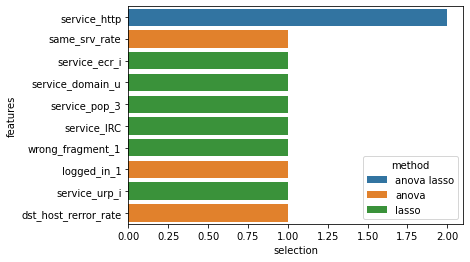

In [38]:
X = train.drop([Target,remove_col], axis=1).values
y = train["class_num"].values
feature_names = train.drop([Target,remove_col], axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False)[0:10], dodge=False)



# Features Importance using random forest

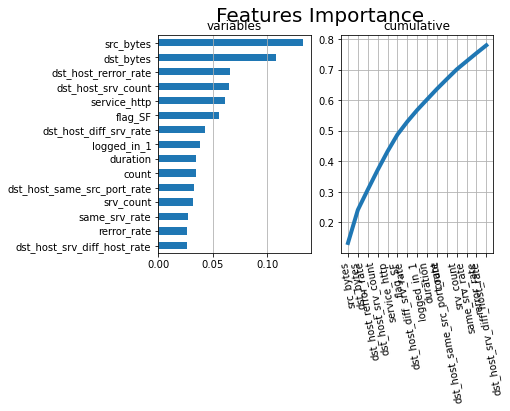

In [39]:
X = train.drop([Target,remove_col], axis=1).values
y = train["class_num"].values
feature_names = train.drop([Target,remove_col], axis=1).columns
## Importance

model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]][0:15].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]][0:15].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances[0:15])), 
          xticklabels=dtf_importances.index[0:15])
plt.xticks(rotation=100)
plt.grid(axis='both')
plt.show()

In [40]:
X_train = train[all_attr].values
y_train = train[Target].values
X_test = test[all_attr].values
y_test = test[Target].values

# Model Building
#### 1. Perform Model Development using at least three models, separately. Apply Machine Learning Models on the dataset. 

# Visualising the best fitting model

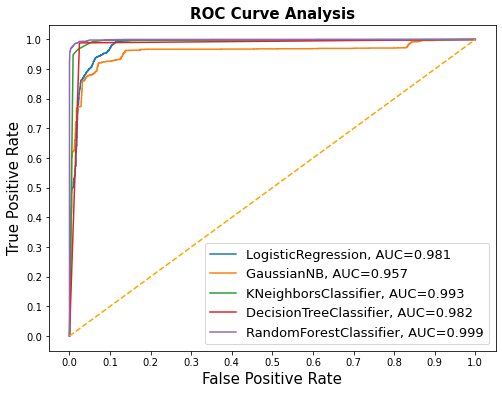

In [41]:
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB()
               ,KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### 3. Train the model and print the training accuracy and loss values

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
Y_pred_prob = logreg.predict_proba(X_test)[::,1]
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


94.09

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

97.36

In [44]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

68.22

In [45]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

93.45

The model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [46]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

99.81

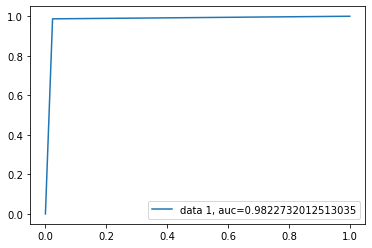

In [47]:
Y_pred_prob = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred)
auc = sklearn.metrics.roc_auc_score(y_test, Y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

99.81

# Visualising features importance

Feature: duration, Score: 0.03275
Feature: src_bytes, Score: 0.15291
Feature: dst_bytes, Score: 0.12609
Feature: hot, Score: 0.01768
Feature: num_failed_logins, Score: 0.00629
Feature: num_compromised, Score: 0.00548
Feature: num_file_creations, Score: 0.00033
Feature: num_shells, Score: 0.00019
Feature: num_access_files, Score: 0.00061
Feature: count, Score: 0.03263
Feature: srv_count, Score: 0.02354
Feature: serror_rate, Score: 0.01343
Feature: rerror_rate, Score: 0.01616
Feature: same_srv_rate, Score: 0.03293
Feature: diff_srv_rate, Score: 0.02063
Feature: srv_diff_host_rate, Score: 0.01144
Feature: dst_host_count, Score: 0.01962
Feature: dst_host_srv_count, Score: 0.06986
Feature: dst_host_diff_srv_rate, Score: 0.04735
Feature: dst_host_same_src_port_rate, Score: 0.03010
Feature: dst_host_srv_diff_host_rate, Score: 0.02447
Feature: dst_host_rerror_rate, Score: 0.07398
Feature: urgent_0, Score: 0.00010
Feature: urgent_1, Score: 0.00005
Feature: urgent_2, Score: 0.00004
Feature: urge

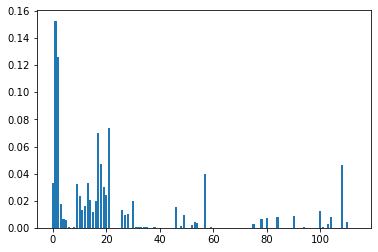

In [49]:
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in (dict(zip(train[all_attr].columns,importance))).items():
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:>

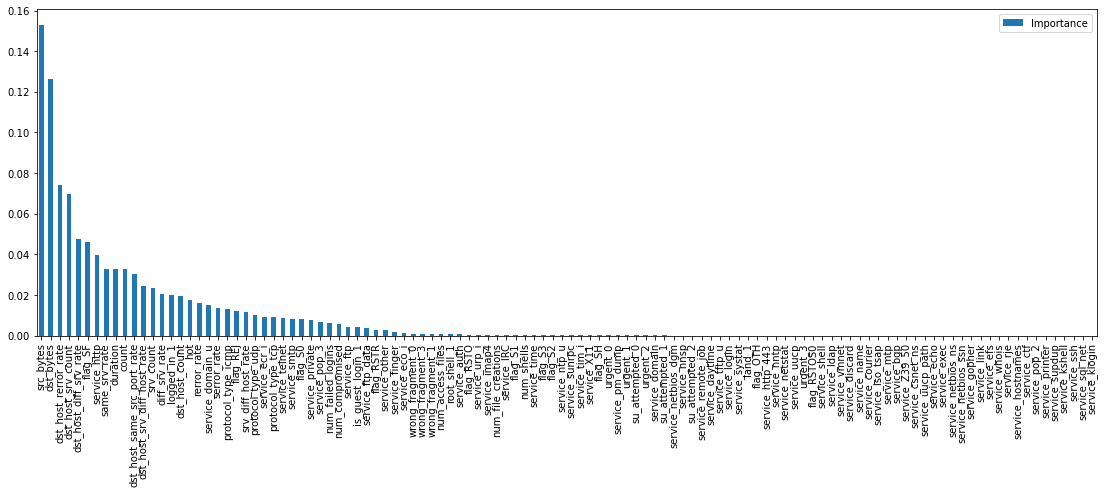

In [50]:
feat_importances = pd.DataFrame(random_forest.feature_importances_, index=train[all_attr].columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(19,6))

### Sorting and finding cumulative weight of different features in descending order

In [51]:
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances['cumulative_weight'] = pd.Series(["{0:.2f}%".format(val * 100) for val in feat_importances.Importance.cumsum()], index = feat_importances.index)

feat_importances

,Importance,cumulative_weight
src_bytes,0.152907,15.29%
dst_bytes,0.126089,27.90%
dst_host_rerror_rate,0.073975,35.30%
dst_host_srv_count,0.069864,42.28%
dst_host_diff_srv_rate,0.047355,47.02%
...,...,...
service_supdup,0.000000,100.00%
service_kshell,0.000000,100.00%
service_ssh,0.000000,100.00%
service_sql_net,0.000000,100.00%


In [52]:
# Analysing and keeping important features

In [53]:
feat_importances[feat_importances.Importance>0.005]

,Importance,cumulative_weight
src_bytes,0.152907,15.29%
dst_bytes,0.126089,27.90%
dst_host_rerror_rate,0.073975,35.30%
dst_host_srv_count,0.069864,42.28%
dst_host_diff_srv_rate,0.047355,47.02%
flag_SF,0.046295,51.65%
service_http,0.039880,55.64%
same_srv_rate,0.032925,58.93%
duration,0.032748,62.20%
count,0.032631,65.47%


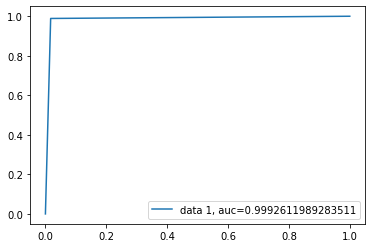

In [54]:
Y_pred_prob = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test,Y_pred)
auc = sklearn.metrics.roc_auc_score(y_test, Y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### 3. Print the confusion matrix. Provide appropriate analysis for the same
#### 4.  Do the prediction for the test data and display the results for the inference

# Genrating Confusion matrix for Random Forest

Confusion Matrix 
 [[1885   33]
 [  29 2562]]
Total Normal or N:              1918
Total Anamoly or P:                  2591
Total Normal Predicted or N^:   1914
Total Anamoly Predicted or P^:       2595


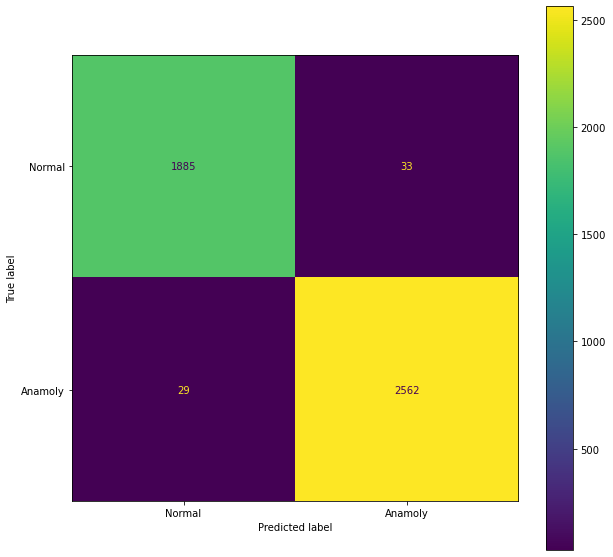

In [55]:
rcParams['figure.figsize'] = 10,10
predicted = random_forest.predict(X_test)
cm = confusion_matrix(y_test, predicted)

cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Anamoly'])
print('Confusion Matrix \n',cm)
print('Total Normal or N:             ' ,cm[0].sum())
print('Total Anamoly or P:                 ',cm[1].sum())
print('Total Normal Predicted or N^:  ' ,cm[0][0]+cm[1][0])
print('Total Anamoly Predicted or P^:      ',cm[0][1]+cm[1][1])
cmd.plot()

# Model Evaluation performance check

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
            'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_random_forest, acc_gaussian, 
               acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.81
5,Decision Tree,99.81
0,Support Vector Machines,97.36
1,Logistic Regression,94.09
4,Linear SVC,93.45
3,Naive Bayes,68.22


----------------------------------------------------------------------------------------------------
LogisticRegression()
Confusion Matrix 
 [[1753  165]
 [ 120 2471]]
Total Normal or N:              1918
Total Anamoly or P:                  2591
Total Normal Predicted or N^:   1873
Total Anamoly Predicted or P^:       2636
----------------------------------------------------------------------------------------------------
Recall (all 1s predicted right): 0.95
Precision (confidence when predicting a 1): 0.94
Detail:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1918
           1       0.94      0.95      0.95      2591

    accuracy                           0.94      4509
   macro avg       0.94      0.93      0.94      4509
weighted avg       0.94      0.94      0.94      4509

----------------------------------------------------------------------------------------------------
--------------------------------------------------

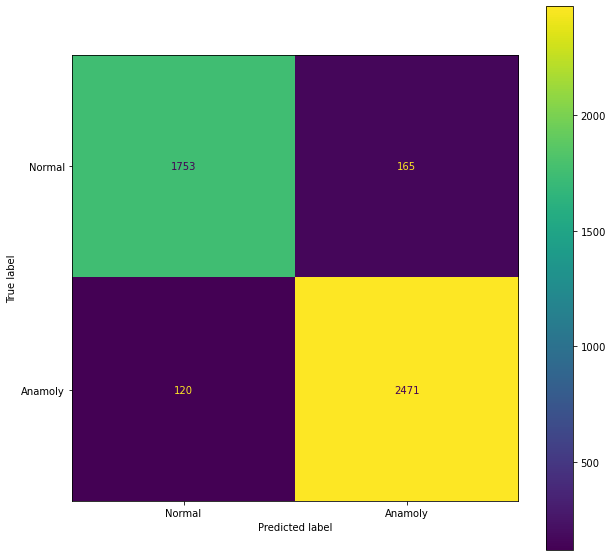

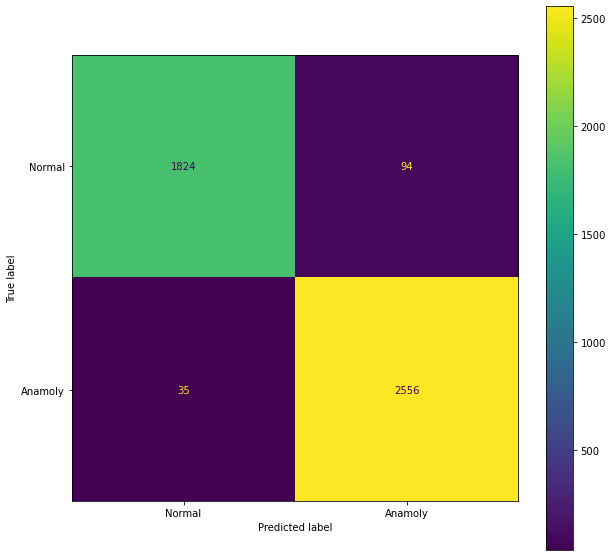

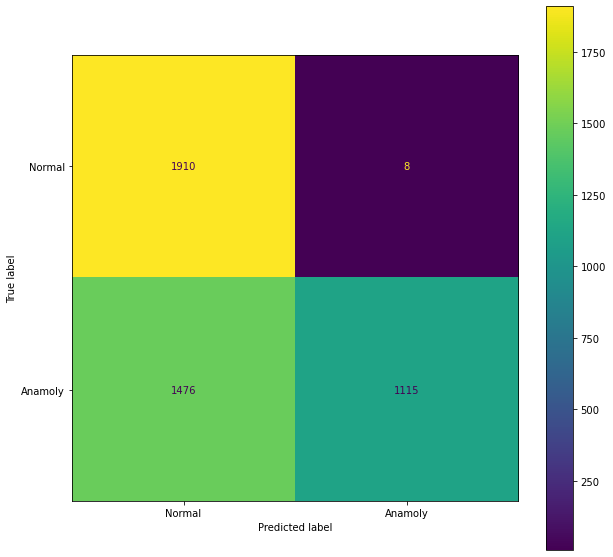

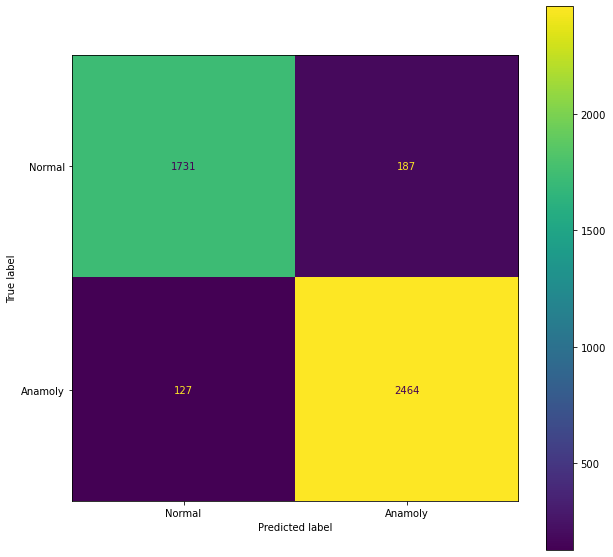

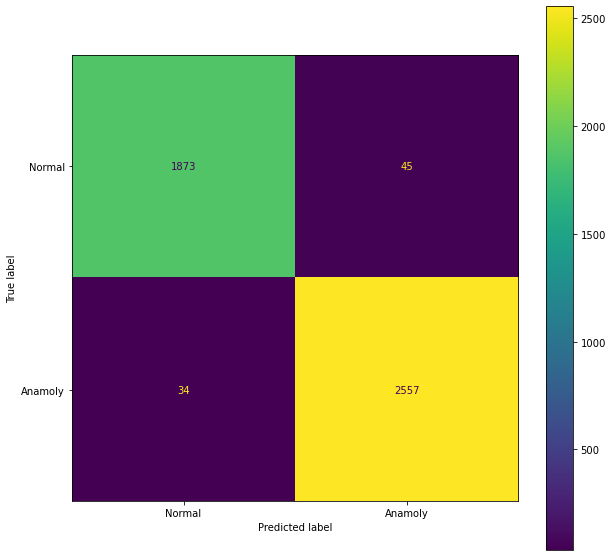

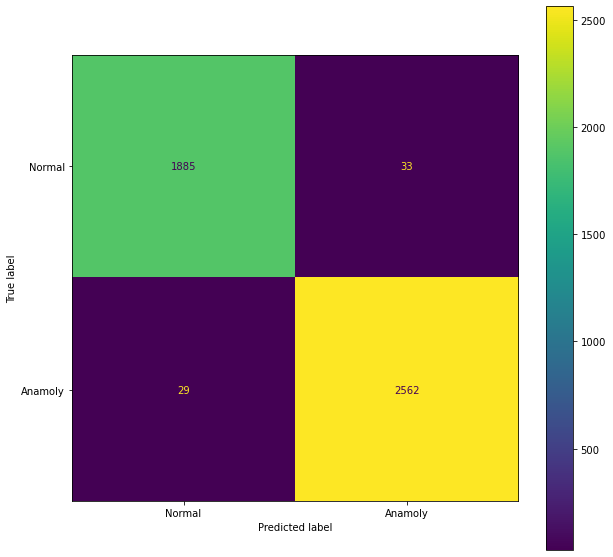

In [57]:

# figure size in inches
rcParams['figure.figsize'] = 20,15
rcParams['figure.figsize'] = 10,10
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model in [logreg,svc,gaussian,linear_svc,decision_tree,random_forest]:
    print('-'*100)
    print(model)
    predicted = model.predict(X_test)
    cm = confusion_matrix(y_test, predicted)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Normal','Anamoly'])
    print('Confusion Matrix \n',cm)
    print('Total Normal or N:             ' ,cm[0].sum())
    print('Total Anamoly or P:                 ',cm[1].sum())
    print('Total Normal Predicted or N^:  ' ,cm[0][0]+cm[1][0])
    print('Total Anamoly Predicted or P^:      ',cm[0][1]+cm[1][1])
    cmd.plot()
    print('-'*100)
    accuracy = metrics.accuracy_score(y_test, predicted)
    ## Precision e Recall
    recall = metrics.recall_score(y_test, predicted)
    precision = metrics.precision_score(y_test, predicted)
    print("Recall (all 1s predicted right):", round(recall,2))
    print("Precision (confidence when predicting a 1):", round(precision,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))
    print('-'*100)
    print('-'*100)